## Following the work of Bair et al 2024 - Brief communication: Not as dirty as they look, flawed airborne and satellite snow spectra

#### 26 Aug 2024

In my papers (as authors have done as well), I am using the default planetary albedo when computing the incoming direct and diffuse irradiance from libRadtran. In their paper, it has been shown this can also lead to hooking in the visible/blue spectrum due to the incorrect diffuse lighting. In short, snow covered images have a higher background reflectance which can actually increase the amount of diffuse light and atmospheric scatterin. 

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [48]:
df = pd.read_csv('/Users/brent/Code/goshawk-mu/data/planet_albedo_example.csv')
df

,Unnamed: 0,Wavelength,edir_025,edn_025,edir_050,edn_050,edir_080,edn_080,edir_095,edn_095,clean,clean_albedo,dirty
0,0,350,156.824816,245.472201,156.824816,289.619589,156.824816,356.402201,156.824816,397.457835,0.939692,0.992773,0.709352
1,1,360,215.532046,285.044284,215.532046,336.120288,215.532046,411.573046,215.532046,456.910977,0.940079,0.993080,0.718504
2,2,370,215.083063,246.554612,215.083063,292.049895,215.083063,358.318780,215.083063,397.609429,0.940269,0.993230,0.727120
3,3,380,162.807891,161.169675,162.807891,190.985665,162.807891,233.633660,162.807891,258.492125,0.940449,0.993373,0.735244
4,4,390,253.174028,220.257626,253.174028,261.910532,253.174028,320.746739,253.174028,354.644124,0.940603,0.993494,0.742912
...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,211,2460,14.609675,0.019219,14.609675,0.020411,14.609675,0.021842,14.609675,0.022558,0.022613,0.060865,0.022613
212,212,2470,13.467723,0.017017,13.467723,0.017832,13.467723,0.018811,13.467723,0.019300,0.021745,0.059106,0.021744
213,213,2480,10.474899,0.012655,10.474899,0.013076,10.474899,0.013582,10.474899,0.013834,0.020904,0.057386,0.020904
214,214,2490,8.614857,0.009961,8.614857,0.010152,8.614857,0.010382,8.614857,0.010498,0.020091,0.055706,0.020091


I have created some clean and dusty snow, as well as libRadtran runs with planetary albedo of 0.25, 0.50, 0.80, and 0.95

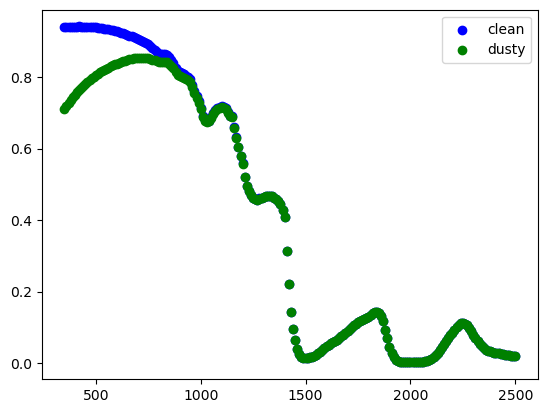

In [82]:
plt.scatter(df.Wavelength, df.clean, color='blue')
plt.scatter(df.Wavelength, df.dirty, c='green')
plt.legend(['clean', 'dusty'])
plt.show()

Now using the expression of D/I as described in their paper....

1st case is downward hooking. This is from having too dark surface on the numerator

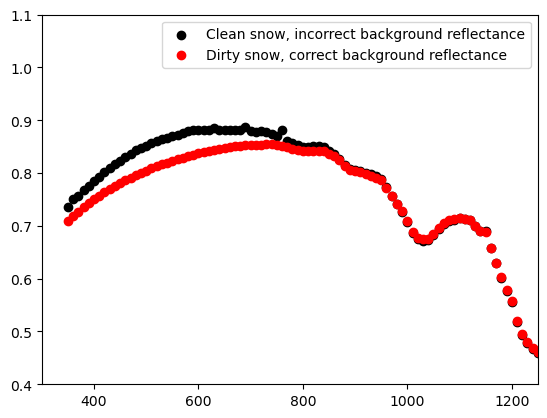

In [83]:
plt.scatter(df.Wavelength, (df.clean*df.edir_025 + df.clean*df.edn_025)  / (df.edir_080+df.edn_080), c='k')
plt.scatter(df.Wavelength, (df.dirty*df.edir_080 + df.dirty*df.edn_080)  / (df.edir_080+df.edn_080), c='red')
plt.legend(['Clean snow, incorrect background reflectance','Dirty snow, correct background reflectance'])
plt.xlim(300,1250)
plt.ylim(0.4,1.1)
plt.show()

2nd case is upward hooking. This occurs when the dark surface is in the denominator.

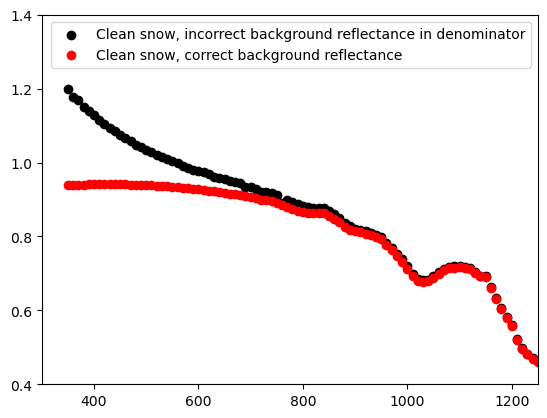

In [87]:
plt.scatter(df.Wavelength, (df.clean*df.edir_080 + df.clean*df.edn_080)  / (df.edir_025+df.edn_025), c='k')
plt.scatter(df.Wavelength, (df.clean*df.edir_080 + df.clean*df.edn_080)  / (df.edir_080+df.edn_080), c='red')
plt.legend(['Clean snow, incorrect background reflectance in denominator','Clean snow, correct background reflectance'])
plt.xlim(300,1250)
plt.ylim(0.4,1.4)
plt.show()

As of 26 Aug 2024, goshawk model for example that I have built out often has the problem of case 2.


For the next version, I will have it download general albedo product, take an image average of albedo, and force the libRadtran in this way. 

This should resolve upward/downward hooking caused by too dark of background reflectance and enable better LAP estimation. 